El archivo _diabetes.csv_ corresponde al dataset 'Pima Indians Diabetes' que contiene observaciones de personas, caracterizadas por ciertas medidas medicales y una categoría binaria indicando si sufren de diabete o no.

La tarea consiste en entrenar un modelo de clasificación binario utilizando el algoritmo de Regresión Logística.

Indicamos a continuación las caracteristicas del dataset:
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

    * Número de veces que ha estado embarazada
    * Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa
    * Presión arterial diastólica (mm Hg)
    * Grosor del pliegue de la piel del tríceps (mm)
    * Insulina en suero de 2 horas (mu U/ml)
    * Índice de masa corporal (peso en kg/(altura en m)^2)
    * Función de pedigrí de la diabetes
    * Edad (años)
    * Categoría (0 ó 1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
df = pd.read_csv("datos/diabetes.csv")
df[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:

X = df.iloc[0:len(df),0]

Y = df.iloc[0:len(df),1] 

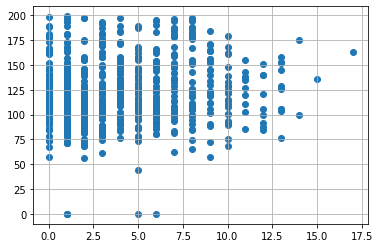

In [4]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

In [5]:
X = df.ix[:,(0,1,2,3,4,5,6,7)].values
y = df.ix[:,8].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[  9.    134.     74.    ...  25.9     0.46   81.   ]
 [  4.    111.     72.    ...  37.1     1.39   56.   ]
 [  8.     95.     72.    ...  36.8     0.485  57.   ]
 ...
 [ 10.    162.     84.    ...  27.7     0.182  54.   ]
 [  0.     93.    100.    ...  43.4     1.021  35.   ]
 [  6.    123.     72.    ...  33.6     0.733  34.   ]]


In [7]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[ 9.91558073e-02  3.47371297e-02 -1.65158521e-02  3.13634058e-03
  -6.22398677e-04  9.86110005e-02  7.25801159e-01  2.11066849e-02]]
intercept: [-8.44340966]


In [9]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [10]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[138,  22],
       [ 25,  46]])

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       160
           1       0.68      0.65      0.66        71

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.80      0.80       231

